<a href="https://colab.research.google.com/github/poojagulati10/Pooja-Gulati_Assignments/blob/main/Cost_of_Living_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PySpark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 36.4 MB/s 
  Created wheel for PySpark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=ec02c5ffa0c941dc200b72133757034b8aa1d495e0c7226c6949467c2e68db64
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built PySpark


In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('CostofLiving').getOrCreate()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Cost_of_Living_Index_2022.csv to Cost_of_Living_Index_2022.csv


In [5]:
df_train = spark.read.csv('Cost_of_Living_Index_2022.csv', inferSchema=True, header = True)

In [6]:
df_train.show()

+----+--------------------+--------------------+----------+------------------------------+---------------+----------------------+----------------------------+
|Rank|             Country|Cost of Living Index|Rent Index|Cost of Living Plus Rent Index|Groceries Index|Restaurant Price Index|Local Purchasing Power Index|
+----+--------------------+--------------------+----------+------------------------------+---------------+----------------------+----------------------------+
|   1|         Afghanistan|               20.37|      2.72|                         12.09|          14.92|                 12.41|                       23.04|
|   2|             Albania|                35.5|      8.47|                         22.83|          29.32|                 25.82|                       30.19|
|   3|             Algeria|               26.87|      4.59|                         16.43|          28.82|                 14.48|                       24.63|
|   4|           Argentina|               34.6

In [7]:
df_train.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Cost of Living Index: double (nullable = true)
 |-- Rent Index: double (nullable = true)
 |-- Cost of Living Plus Rent Index: double (nullable = true)
 |-- Groceries Index: double (nullable = true)
 |-- Restaurant Price Index: double (nullable = true)
 |-- Local Purchasing Power Index: double (nullable = true)



In [8]:
df_train.columns

['Rank',
 'Country',
 'Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index']

In [9]:
#Vectorization
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index'], outputCol='Independant Features')

In [10]:
#transform each element of the input array + Independant features column
output=featureassembler.transform(df_train)

In [11]:
output.show()

+----+--------------------+--------------------+----------+------------------------------+---------------+----------------------+----------------------------+--------------------+
|Rank|             Country|Cost of Living Index|Rent Index|Cost of Living Plus Rent Index|Groceries Index|Restaurant Price Index|Local Purchasing Power Index|Independant Features|
+----+--------------------+--------------------+----------+------------------------------+---------------+----------------------+----------------------------+--------------------+
|   1|         Afghanistan|               20.37|      2.72|                         12.09|          14.92|                 12.41|                       23.04|[2.72,12.09,14.92...|
|   2|             Albania|                35.5|      8.47|                         22.83|          29.32|                 25.82|                       30.19|[8.47,22.83,29.32...|
|   3|             Algeria|               26.87|      4.59|                         16.43|          

In [12]:
output.columns

['Rank',
 'Country',
 'Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index',
 'Independant Features']

In [17]:
df = df_train

In [15]:
df.describe()

DataFrame[summary: string, Rank: string, Country: string, Cost of Living Index: string, Rent Index: string, Cost of Living Plus Rent Index: string, Groceries Index: string, Restaurant Price Index: string, Local Purchasing Power Index: string]

In [18]:
# The .select() is a transformation function that is used to select the columns from DataFrame and Dataset
fin_output= output.select("Independant Features", "Cost of Living Index")

In [19]:
df.describe()

DataFrame[summary: string, Rank: string, Country: string, Cost of Living Index: string, Rent Index: string, Cost of Living Plus Rent Index: string, Groceries Index: string, Restaurant Price Index: string, Local Purchasing Power Index: string]

In [20]:
#Count number of observation in the given dataset
row = df.count()
print(row)

139


In [21]:
# Provide Summary Statistics of all columns (count, mean, stddev,min, max)
df.describe().show(vertical=True)

-RECORD 0--------------------------------------------
 summary                        | count              
 Rank                           | 139                
 Country                        | 139                
 Cost of Living Index           | 139                
 Rent Index                     | 139                
 Cost of Living Plus Rent Index | 139                
 Groceries Index                | 139                
 Restaurant Price Index         | 139                
 Local Purchasing Power Index   | 139                
-RECORD 1--------------------------------------------
 summary                        | mean               
 Rank                           | 70.0               
 Country                        | null               
 Cost of Living Index           | 50.18863309352518  
 Rent Index                     | 19.29151079136691  
 Cost of Living Plus Rent Index | 35.70532374100718  
 Groceries Index                | 46.637841726618696 
 Restaurant Price Index     

In [22]:
df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Cost of Living Index: double (nullable = true)
 |-- Rent Index: double (nullable = true)
 |-- Cost of Living Plus Rent Index: double (nullable = true)
 |-- Groceries Index: double (nullable = true)
 |-- Restaurant Price Index: double (nullable = true)
 |-- Local Purchasing Power Index: double (nullable = true)



In [23]:
fin_output.show()

+--------------------+--------------------+
|Independant Features|Cost of Living Index|
+--------------------+--------------------+
|[2.72,12.09,14.92...|               20.37|
|[8.47,22.83,29.32...|                35.5|
|[4.59,16.43,28.82...|               26.87|
|[7.71,22.04,28.17...|               34.69|
|[11.61,23.45,27.5...|               33.89|
|[36.84,58.57,77.4...|               77.75|
|[27.13,50.46,65.8...|               71.04|
|[7.86,19.48,26.57...|               29.73|
|[35.34,61.19,70.5...|                84.0|
|[29.22,42.79,44.5...|               54.77|
|[4.42,19.67,30.41...|               33.13|
|[21.99,59.38,87.8...|               92.37|
|[9.81,21.01,27.24...|               30.89|
|[25.79,50.67,63.3...|               72.61|
|[11.64,32.71,48.7...|                51.3|
|[98.58,123.8,148....|              146.04|
|[10.18,23.24,31.2...|               34.77|
|[6.82,22.39,31.14...|               36.12|
|[10.21,26.12,35.1...|               40.17|
|[8.27,21.54,28.16...|          

In [24]:
from pyspark.ml.regression import LinearRegression

#train_test_split
#featuresCol will be the input column and labelCol will be the target column
train_X, test_X= fin_output.randomSplit([0.8, 0.2])
reg=LinearRegression(featuresCol='Independant Features', labelCol='Cost of Living Index')
reg=reg.fit(train_X)

In [25]:
#Find out model coefficients and intercept
coeff = reg.coefficients
intr = reg.intercept

print("The coef of Model is : %a" %coeff)
print("The Intercept of the model is: %f" %intr)

The coef of Model is : DenseVector([-0.8825, 1.8828, -0.0001, -0.0001, 0.0])
The Intercept of the model is: -0.001972


In [26]:
#Model Evaluation
pred=reg.evaluate(test_X)

In [27]:
pred.predictions.show()

+--------------------+--------------------+------------------+
|Independant Features|Cost of Living Index|        prediction|
+--------------------+--------------------+------------------+
|[2.72,12.09,14.92...|               20.37|20.357910529665794|
|[4.42,19.67,30.41...|               33.13| 33.12617823686308|
|[6.06,19.51,26.95...|               31.38|31.378456346994547|
|[7.71,22.04,28.17...|               34.69| 34.68357321875519|
|[8.04,18.14,24.84...|               27.05|27.052418369866928|
|[8.18,18.03,23.47...|               26.72|26.721275043310545|
|[8.47,22.83,29.32...|                35.5|35.501186074309146|
|[9.07,24.64,34.02...|               38.38| 38.37870744731425|
|[9.19,22.1,31.0,2...|                33.5|33.490502574220685|
|[9.23,30.46,40.81...|               49.19|49.192664801569535|
|[9.26,21.9,31.53,...|               33.04|33.053690090224286|
|[9.44,19.66,25.35...|               28.68|28.677014535978717|
|[9.59,26.68,38.45...|               41.77| 41.75886506

In [28]:
pred.meanAbsoluteError, pred.meanSquaredError

(0.005146341635943281, 4.039890539319501e-05)

In [29]:
pred.r2

0.99999977656948

In [30]:
pred.rootMeanSquaredError

0.006356013325441901

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(array([59., 41., 15., 11.,  6.,  3.,  2.,  1.,  0.,  1.]),
 array([ 2.72 , 12.306, 21.892, 31.478, 41.064, 50.65 , 60.236, 69.822,
        79.408, 88.994, 98.58 ]),
 <a list of 10 Patch objects>)

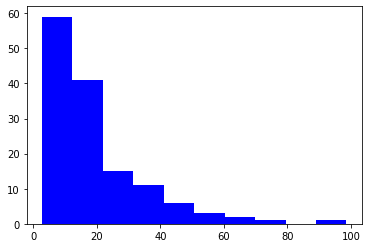

In [31]:
#Plot Rent Index column on a 2D Plot
!pip install pyspark_dist_explore
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
hist(ax, df.select('Rent Index'), color = ['blue'])

In [32]:
#Linear Regression Model
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol = "Cost of Living Index", predictionCol = "prediction", metricName = "rmse")


In [33]:
#Model Performance statistics 
#Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE : %f" %rmse)

#mean square error

mse = eval.evaluate(pred.predictions,{eval.metricName: "mse"})

print("MSE: %.3f" % mse)



#mean absolute error

mae = eval.evaluate(pred.predictions,{eval.metricName: "mae"})

print("MAE: %.3f" % mae)



#r2 - coefficient

r2 = eval.evaluate(pred.predictions,{eval.metricName: "r2"})

print("r2: %.3f" % r2)

RMSE : 0.006356
MSE: 0.000
MAE: 0.005
r2: 1.000
